# Exploratory Data Analysis (EDA) Excercise - Data Visualization

## Haberman's Survival Data Set

https://www.kaggle.com/gilsousa/habermans-survival-data-set <br />
Number of observations: 306 <br />
Total Features: 3 <br />
Class Lable: 1 <br />

Features Attribute Details
* Age of patient at the time of operation (numerical)
* Patient's year of operation (numerical)
* Number of positive axillary nodes detected (numerical)
* Class Lable 
        1 - patient has survived 5 or more years
        2 - patient died within 5 year
        

## Objective

It is a Classification Problem.
<br /><br />
By given the age, year of operation and positive axillary nodes detected in the patient predict whether the patient will survive for next 5 years or not

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# provide lable to each column in dataset
col = ['Patient_age', 'Year_of_operation', 'pos_axillary_nodes', 'status']
#load dataset from csv file
dataset = pd.read_csv("haberman.csv", names = col)

In [4]:
print(dataset.shape)

(306, 4)


Attribute - 305 <br />
Column - 4

In [5]:
dataset['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

This is kind of <b>imbalance</b> dataset <br />
225 observations (patients) has survived and 81 observations (patients) died.

In [6]:
#sample dataset -- first 5 observations
dataset.head()

,Patient_age,Year_of_operation,pos_axillary_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## 2D Scatter Plot

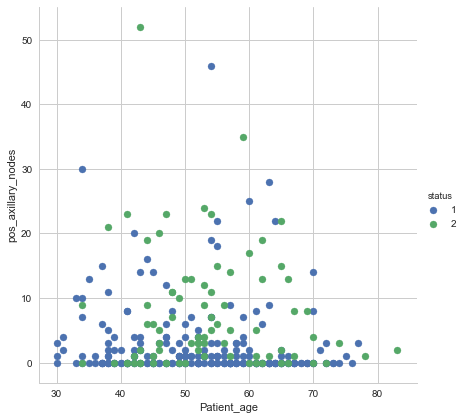

In [7]:
# 2-D Scatter plot with color-coding for each type/class.

sns.set_style("whitegrid");
sns.FacetGrid(dataset, hue="status", size=6) \
   .map(plt.scatter, "Patient_age", "pos_axillary_nodes") \
   .add_legend();
plt.show();

Observation: <br />
1) Most of the patients have axillary nodes between 0 and 5. <br />
2) From the graph Axillary nodes versus Age, we can say that most people who survived have 0 to 5 Auxillary nodes detected. <br />
3) All patient age is between 30 to 78.

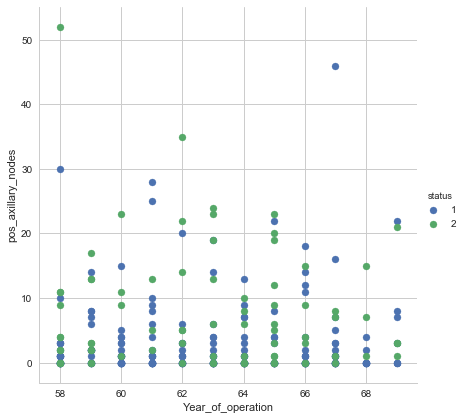

In [8]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset, hue="status", size=6) \
   .map(plt.scatter, "Year_of_operation", "pos_axillary_nodes") \
   .add_legend();
plt.show();

Observation: <br />
1) It is not possible to classify the observation based on Operation_year and pos_node.<br />
2) All the obervations's operation is done between 1958-1970

## Pair Plot

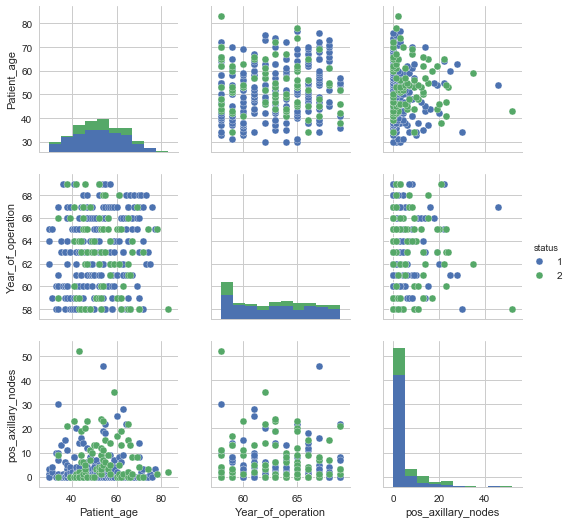

In [9]:
sns.set_style("whitegrid");
sns.pairplot(dataset, hue="status",
             vars=col[0:3])
plt.show()

Observation: <br />
1) <b>We need nonlinear classifier to classify this dataset. </b><br />
2) Most of the patients have axillary nodes between 0 and 5. <br />
3) From the graph Auxillary nodes versus Age, we can say that most people who survived have 0 to 5 Auxillary nodes detected.

## Histogram, PDF, CDF


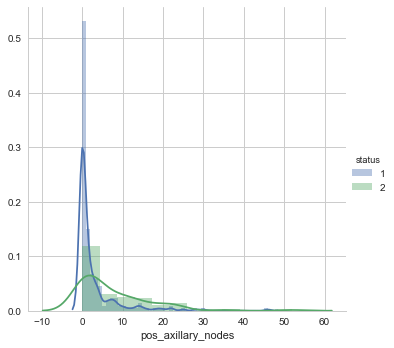

In [10]:
sns.FacetGrid(dataset, hue="status", size=5) \
   .map(sns.distplot, "pos_axillary_nodes") \
   .add_legend();
plt.show();

Observation: <br />
Most of the patients have axillary nodes between 0 and 5. <br />
From the graph Auxillary nodes versus Age, we can say that most people who survived have 0 to 5 Axillary nodes detected.

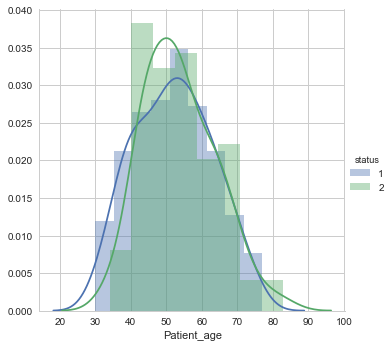

In [11]:
sns.FacetGrid(dataset, hue="status", size=5) \
   .map(sns.distplot, "Patient_age") \
   .add_legend();
plt.show();

Observation:<br/>
As above graph is most likely normal distribution, the possibility of corrupted data is less and we can use mean, std-dev and variance as statistical measurement. <br /><br />
Important Feature:<br/>
Pos_Auxilary_Node > Patient_age = Operation_year

In [14]:
# alive means status=1 and dead means status =2
alive = dataset.loc[dataset['status'] == 1]
dead = dataset.loc[dataset['status'] == 2]

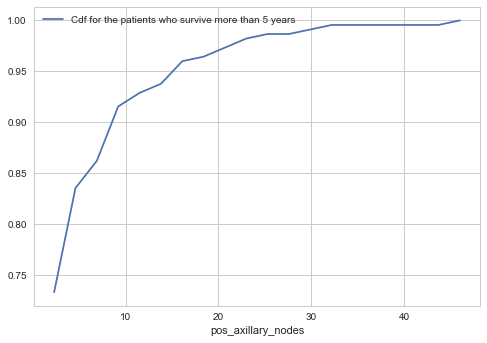

In [39]:
counts, bin_edges = np.histogram(alive['pos_axillary_nodes'], bins=20, 
                                 density = True,)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('pos_axillary_nodes')
plt.legend(['Cdf for the patients who survive more than 5 years'])
plt.show()

72% of the people who have survived has pos_axillary_node less than 3. <br />
<b> The Patient who had pos_axillary_node greater than 46, didn't survive. </b><br />

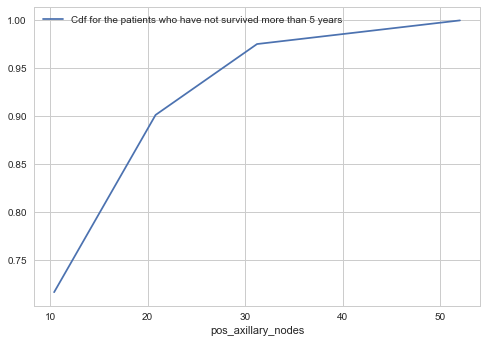

In [36]:
counts, bin_edges = np.histogram(dead['pos_axillary_nodes'], bins=5, 
                                 density = True,)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf,)
plt.legend(['Cdf for the patients who have not survived more than 5 years'])
plt.xlabel('pos_axillary_nodes')
plt.show()

72% of the people who have not survived has pos_axillary_node less than 10. <br />

## Mean, Variance, Std-dev

In [40]:
print("Summary Statistics of Patients")
dataset.describe()

Summary Statistics of Patients


,Patient_age,Year_of_operation,pos_axillary_nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [41]:
print("Summary Statistics of Patients, who have survived")
alive.describe()

Summary Statistics of Patients, who have survived


,Patient_age,Year_of_operation,pos_axillary_nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [42]:
print("Summary Statistics of Patients, who have not survived")
dead.describe()

Summary Statistics of Patients, who have not survived


,Patient_age,Year_of_operation,pos_axillary_nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


Observation: <br />
1) 72% of the people who have survived have pos_axillary_node less than 3. <br />
2)<b> The Patient who had pos_axillary_node greater than 46, didn't survive. </b><br />
3) All the values of the features patient_age and year_of_operation are almost same so pos_axillary_node is the more informative feature.<br/>
4) As mean age of survival and non-survived observation is almost same we can infer that survival status is not much dependent on the age of a patient.

# Box Plot and Whiskers

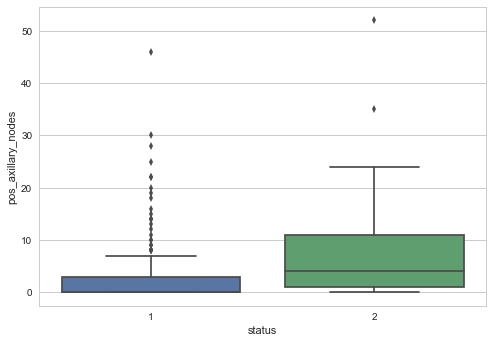

In [47]:
sns.boxplot(x='status',y='pos_axillary_nodes', data=dataset)
plt.show()

## Violin plots

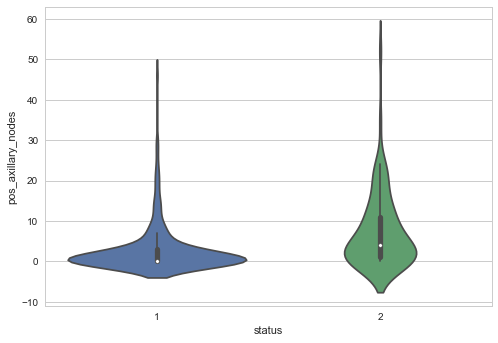

In [50]:
sns.violinplot(x='status',y='pos_axillary_nodes', data=dataset)
plt.show()

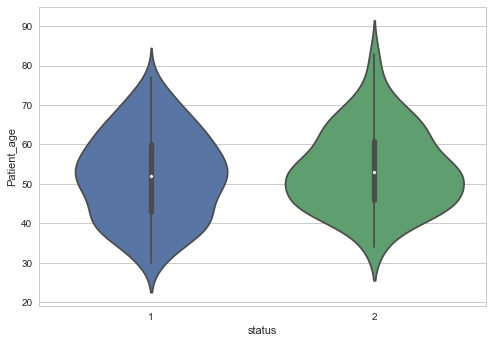

In [52]:
sns.violinplot(x='status',y='Patient_age', data=dataset)
plt.show()

## contors-plot

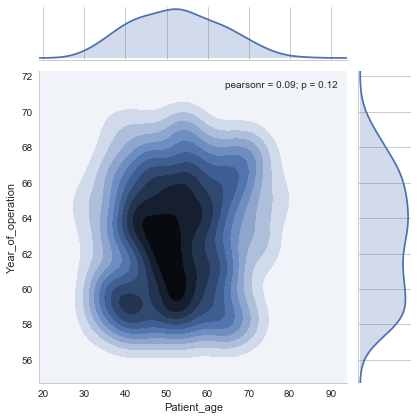

In [53]:
sns.jointplot(x= 'Patient_age',kind = 'kde', y='Year_of_operation', data = dataset)
plt.show()